## 🛑 Early Stopping, Normalization, and Dropout in Neural Networks

---

### ⏹️ Early Stopping

**Early stopping** is a regularization technique to prevent overfitting by stopping the training process when the model performance stops improving on a validation set.

```python
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',         # What to monitor ('val_loss' or 'val_accuracy')
    min_delta=0.001,            # Minimum change to qualify as improvement
    patience=5,                 # No. of epochs to wait after no improvement
    verbose=1,                  # Verbosity mode
    mode='auto',                # 'min', 'max', or 'auto'
    baseline=None,              # Baseline value for stopping
    restore_best_weights=True   # Restore model weights from best epoch
)



---

### 🔑 Parameters Explained: EarlyStopping

| Parameter             | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `monitor`             | Metric to watch (e.g., `'val_loss'` or `'val_accuracy'`)                   |
| `min_delta`           | Minimum change considered as an improvement                                 |
| `patience`            | No. of epochs to wait for improvement before stopping                       |
| `verbose`             | If `1`, shows messages when early stopping is triggered                     |
| `mode`                | `'min'`, `'max'`, or `'auto'` - decides if lower or higher is better        |
| `baseline`            | Value that training should surpass                                          |
| `restore_best_weights`| If `True`, restores weights from the best epoch                             |

#### 🔁 `mode` Options:
- `'min'`: Stops when the monitored metric stops **decreasing** (e.g., loss).
- `'max'`: Stops when the monitored metric stops **increasing** (e.g., accuracy).
- `'auto'`: Chooses automatically based on the metric name.

---

### 📊 Normalization

Neural networks perform better when input features are scaled to a similar range.

#### 🔧 Why Normalize?
If features are on different scales (e.g., salary in lakhs vs. age in years), the network may prioritize high-scale features and underlearn others.

---

### 🔁 Two Common Normalization Techniques

#### 1. **Standardization (Z-score Normalization)**

$$
z = \frac{x - \mu}{\sigma}
$$

- Transforms data to **mean = 0** and **standard deviation = 1**
- Best for: **Normally distributed data**

---

#### 2. **Min-Max Normalization**

$$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

- Scales features to the **[0, 1]** range
- Best when **min and max values are known**, e.g., percentages

---

### 📌 When to Use What?

| Situation                       | Technique     |
|--------------------------------|---------------|
| Data is normally distributed   | Standardize   |
| Min/Max values are known       | Normalize     |
| Features have different units  | Prefer Standardize |

---

### 🚫 Dropout

**Dropout** is a regularization method that reduces overfitting by randomly deactivating neurons during training.

#### 🔍 What It Does:
- During each epoch, randomly drops a set of neurons from input and hidden layers.
- Forces the model to not depend too heavily on specific neurons.
- Makes the network more robust and generalizable.

---

#### 📉 Training Dynamics:
- Each epoch effectively trains a **slightly different sub-network**.
- For example:
  - **Epoch 1**: Neuron A is dropped
  - **Epoch 2**: Neuron B is dropped
- Leads to a form of **ensemble learning** during training.

---

#### 📌 Key Notes:
- Dropout is applied **only during training**, not during testing or inference.
- During evaluation, the **full network** is used, and activations are scaled to account for dropout.

---

### 🔧 Choosing Dropout Rate `p`

| Dropout Rate (`p`) | Effect                     |
|--------------------|----------------------------|
| Low (`~0.1`)       | Minimal regularization     |
| Medium (`~0.3`)    | Commonly used              |
| High (`~0.5+`)     | Risk of underfitting       |

---



```python
from keras.layers import Dropout

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Drop 30% of neurons


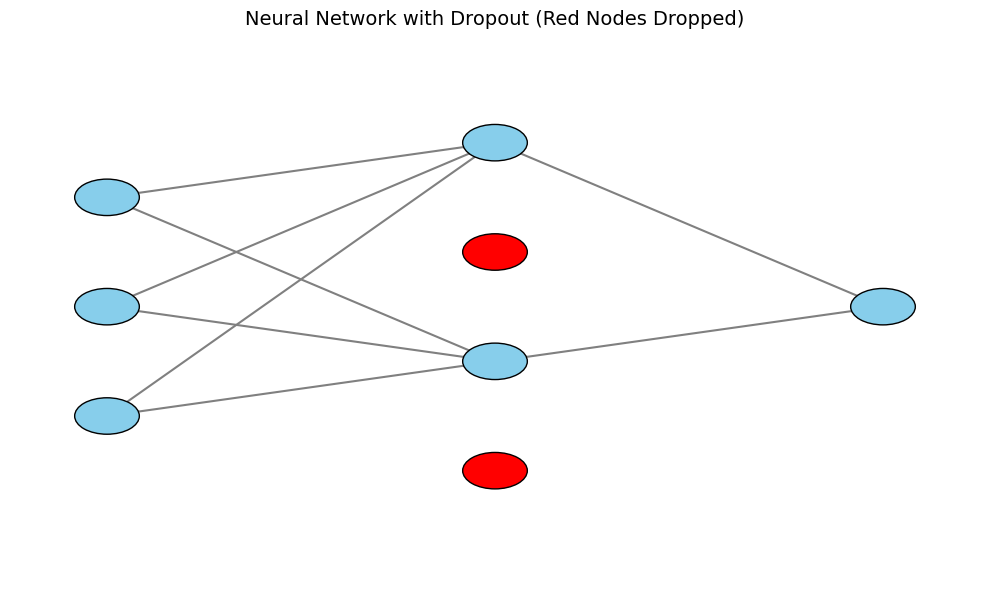

In [1]:
import matplotlib.pyplot as plt

# Re-define function and plot after state reset
def draw_neural_net(ax, layers, dropout_nodes=None, dropout_color='red'):
    left, right, bottom, top = .1, .9, .1, .9
    n_layers = len(layers)
    v_spacing = (top - bottom)/float(max(layers))
    h_spacing = (right - left)/float(n_layers - 1)
    
    # Nodes
    node_positions = {}
    for i in range(n_layers):
        layer_top = v_spacing*(layers[i] - 1)/2. + (top + bottom)/2.
        for j in range(layers[i]):
            node_positions[(i, j)] = (left + i*h_spacing, layer_top - j*v_spacing)
            circle = plt.Circle(node_positions[(i, j)], v_spacing/6.,
                                color=dropout_color if dropout_nodes and (i, j) in dropout_nodes else 'skyblue', 
                                ec='k', zorder=4)
            ax.add_artist(circle)
    
    # Edges
    for i in range(n_layers - 1):
        for j in range(layers[i]):
            for k in range(layers[i+1]):
                if not dropout_nodes or ((i, j) not in dropout_nodes and (i+1, k) not in dropout_nodes):
                    line = plt.Line2D([node_positions[(i, j)][0], node_positions[(i+1, k)][0]],
                                      [node_positions[(i, j)][1], node_positions[(i+1, k)][1]], c='gray')
                    ax.add_artist(line)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
draw_neural_net(ax, layers=[3, 4, 1], dropout_nodes={(1, 1), (1, 3)})
plt.title("Neural Network with Dropout (Red Nodes Dropped)", fontsize=14)
plt.tight_layout()
plt.show()



## 🛠️ Practical Tips & Tricks for Neural Networks

---

### 🔁 Tuning Dropout Rate (`p`)

| Situation        | Action                                   |
|------------------|-------------------------------------------|
| Overfitting      | 🔼 Increase `p` (more dropout)            |
| Underfitting     | 🔽 Decrease `p` (less dropout)            |

> ✅ `p` is the dropout probability, representing the fraction of neurons to **drop randomly** during training.

---

### 💡 Dropout Usage by Architecture

| Network Type | Recommended `p` Range | Typical Dropout Example |
|--------------|------------------------|--------------------------|
| **ANN**      | `10–50%`               | `Dropout(0.2)`           |
| **CNN**      | `40–50%`               | `Dropout(0.4)`           |
| **RNN**      | `20–30%`               | `Dropout(0.25)`          |

#### 🔁 Practical Notes:
- In **ANNs**, use dropout in **hidden layers** to prevent overfitting.
- In **CNNs**, dropout is often applied **after the last convolutional or dense layer**.
- In **RNNs**, be cautious—too much dropout may harm temporal dependencies.

---

### ⚠️ Drawbacks of Dropout

| Effect              | Explanation                                                                 |
|---------------------|------------------------------------------------------------------------------|
| ❌ Slower Convergence | Random dropout leads to unstable weight updates                            |
| 📉 Loss Function Variance | Cost function fluctuates due to different sub-networks per epoch        |
| 🧮 Noisy Gradients   | Can lead to noisier updates in backpropagation                             |

---

## 🧰 Regularization in Neural Networks

---

### 🎯 Goal:
Minimize the loss function **while discouraging overly complex models** (especially large weights).

#### ✅ Why?
Large weights → Complex model → High variance → Overfitting  
Regularization → Penalize large weights → Promote simpler, more generalizable models

---

### 🧮 L1 vs L2 Regularization

| Regularization | Formula                              | Behavior                      | Use Case           |
|----------------|--------------------------------------|-------------------------------|--------------------|
| **L1 (Lasso)** | `λ * ||w||₁` = `λ * Σ |wᵢ|`         | Drives many weights to 0 → sparse model | Feature selection |
| **L2 (Ridge)** | `λ * ||w||²` = `λ * Σ wᵢ²`          | Shrinks weights near 0 but not zero | Regular usage      |

---

### 📉 Loss Function with L2 Regularization

Let:
- $( \eta $): learning rate  
- $( \lambda $): regularization strength  
- $( \frac{\partial L}{\partial w_0} $): gradient of loss w.r.t. weight

**Weight Update Rule:**

$$
w_{\text{new}} = w_0 - \eta \left( \frac{\partial L}{\partial w_0} + \lambda w_0 \right)
$$

Or rearranged:

$$
w_{\text{new}} = (1 - \eta \lambda) \cdot w_0 - \eta \frac{\partial L}{\partial w_0}
$$

✅ Interpretation:
- The term $( (1 - \eta \lambda) \cdot w_0 $) naturally **shrinks weights** every step.
- Encourages weights to remain small to avoid overfitting.

---

### 🧠 Tip:
- Use **L2 Regularization** when you want smooth models.
- Use **L1 Regularization** when you want sparse models with fewer active weights (e.g., feature selection).

---

🔚 Together, **dropout**, **early stopping**, and **regularization** form a powerful toolkit for making neural networks that generalize well and perform robustly in real-world tasks.


# Code Examples

## ✅ 1. Early Stopping (Keras)
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_val, y_val) = mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0  # Normalization
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

# Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    mode='auto',
    restore_best_weights=True,
    verbose=1
)

# Fit model
model.fit(x_train, y_train, epochs=100, batch_size=64, 
          validation_data=(x_val, y_val), callbacks=[early_stop])
```

## ✅ 2. Normalization Techniques
```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Simulated feature data
X = np.random.rand(100, 5) * 100 + 50  # Wide range data

# Standardization (mean = 0, std = 1)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Normalization (min = 0, max = 1)
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

# Print examples
print("Original:\n", X[:3])
print("Standardized:\n", X_standardized[:3])
print("Normalized:\n", X_normalized[:3])
```
> 💡 Use StandardScaler when data is normally distributed, and MinMaxScaler when you know min/max range or use it for pixel data (like images).

## ✅ 3. Dropout in Neural Network
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),  # Drop 30% neurons
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))
```
> ✅ Dropout is only active during training, not during evaluation or testing.

